In [25]:
import pandas as pd
import plotly.express as px

In [10]:
from dnd_classes import Character, Spell, Attack, Die, Roll, CombatManager

In [12]:
hero = Character("Hero",
                {'str':6, 'dex':10, 'con':10, 'int': 10, 'wis': 10, 'cha':10},50,[],[Spell("Holy Smite", '4d4')],False)
skeleton = Character("Skeleton",
                    {'str':10, 'dex':10, 'con':10, 'int': 10, 'wis': 10, 'cha':10},20,[Attack("Melee", '3d4','str')],[], True)
zombie = Character("Zombie",
                   {'str':10, 'dex':10, 'con':10, 'int': 10, 'wis': 10, 'cha':10},15,[Attack("Claw", '1d4','str')],[],True)

characters = [hero,skeleton, zombie, zombie, zombie]

def run_combat(characters):
    combat_manager = CombatManager(characters)
    while True:
        if not combat_manager.combat_round():
            break
    winning_side = combat_manager.select_winning_side()
    return winning_side

In [15]:
test_roll = Roll('6d6+4d2+6-1d20^')
test_roll.get_outcome()

12

In [2]:
6 % 4


2

In [3]:
import math
math.floor(6/4)

1

In [7]:
for i in range(1,21):
    print(f"Level {i}: prof: {math.floor((i-1)/4)+2}")

Level 1: prof: 2
Level 2: prof: 2
Level 3: prof: 2
Level 4: prof: 2
Level 5: prof: 3
Level 6: prof: 3
Level 7: prof: 3
Level 8: prof: 3
Level 9: prof: 4
Level 10: prof: 4
Level 11: prof: 4
Level 12: prof: 4
Level 13: prof: 5
Level 14: prof: 5
Level 15: prof: 5
Level 16: prof: 5
Level 17: prof: 6
Level 18: prof: 6
Level 19: prof: 6
Level 20: prof: 6


In [13]:
run_combat(characters)

Hero initiative: 10
Skeleton initiative: 12
Zombie initiative: 19
Zombie initiative: 9
Zombie initiative: 2

Skeleton's turn:
Melee attack roll: 5
Melee misses Hero!

Hero's turn:
Casting Holy Smite! Damage: 13
Skeleton takes 13 damage. Remaining health: 7

Zombie's turn:
Claw attack roll: 4
Claw misses Hero!

Zombie's turn:
Claw attack roll: 1
Claw misses Hero!

Zombie's turn:
Claw attack roll: 14
Claw attack! Damage: 1
Hero takes 1 damage. Remaining health: 49

Skeleton's turn:
Melee attack roll: 17
Melee attack! Damage: 7
Hero takes 7 damage. Remaining health: 42

Hero's turn:
Casting Holy Smite! Damage: 10
Skeleton takes 10 damage. Remaining health: -3

Zombie's turn:
Claw attack roll: 5
Claw misses Hero!

Zombie's turn:
Claw attack roll: 14
Claw attack! Damage: 3
Hero takes 3 damage. Remaining health: 39

Zombie's turn:
Claw attack roll: 19
Claw attack! Damage: 3
Hero takes 3 damage. Remaining health: 36

Hero's turn:
Casting Holy Smite! Damage: 10
Zombie takes 10 damage. Remainin

'non-hostiles'

In [31]:
CSV_NAME = 'results.csv'
data = pd.read_csv(CSV_NAME)
hostile_wins = data[data['winner'] == 'hostiles']
grouped_data = hostile_wins.groupby(['dex', 'dice']).size().reset_index(name='hostile_wins')
total_counts = data.groupby(['dex', 'dice']).size().reset_index(name='total_counts')
win_percentage_data = pd.merge(grouped_data, total_counts, on=['dex', 'dice'])
win_percentage_data['win_percentage'] = (win_percentage_data['hostile_wins'] / win_percentage_data['total_counts']) * 100
win_percentage_matrix = win_percentage_data.pivot(index='dex', columns='dice', values='win_percentage')
win_percentage_matrix.fillna(0, inplace=True)
win_percentage_matrix

dice,4,5,6,7,8,9,10
dex,,,,,,,
9,0.022222,0.311111,2.200000,6.800000,8.755556,13.800000,26.111111
10,0.000000,0.222222,2.088889,6.755556,9.155556,15.155556,29.444444
11,0.022222,0.377778,1.866667,7.222222,9.600000,14.244444,27.622222
12,0.000000,0.333333,2.022222,7.688889,9.600000,15.444444,27.822222
13,0.022222,0.266667,2.777778,7.222222,10.022222,14.888889,27.377778
14,0.000000,0.288889,1.977778,7.577778,10.688889,15.244444,28.911111
15,0.000000,0.488889,2.488889,7.911111,9.955556,16.555556,28.311111
16,0.000000,0.466667,2.844444,8.222222,11.822222,17.600000,29.488889
17,0.000000,0.577778,2.577778,9.377778,11.466667,17.311111,30.355556


In [13]:


# Preprocessing data to calculate win percentages
data_grouped = data.groupby(['dex', 'dice', 'winner']).size().unstack(fill_value=0)
data_grouped['total'] = data_grouped.sum(axis=1)
data_grouped['hostile_win_percentage'] = data_grouped.get('hostiles', 0) / data_grouped['total'] * 100

# Resetting index for better plotting
data_grouped_reset = data_grouped.reset_index()

# Creating an interactive Plotly figure
fig = px.scatter(data_grouped_reset, x='dex', y='dice', size='total', color='hostile_win_percentage',
                 hover_data=['hostile_win_percentage'],
                 labels={'hostile_win_percentage': 'Hostile Win Percentage (%)', 
                         'total': 'Total Encounters'},
                 title='Percentage of Wins for Hostiles by DEX and DICE')

fig.show()

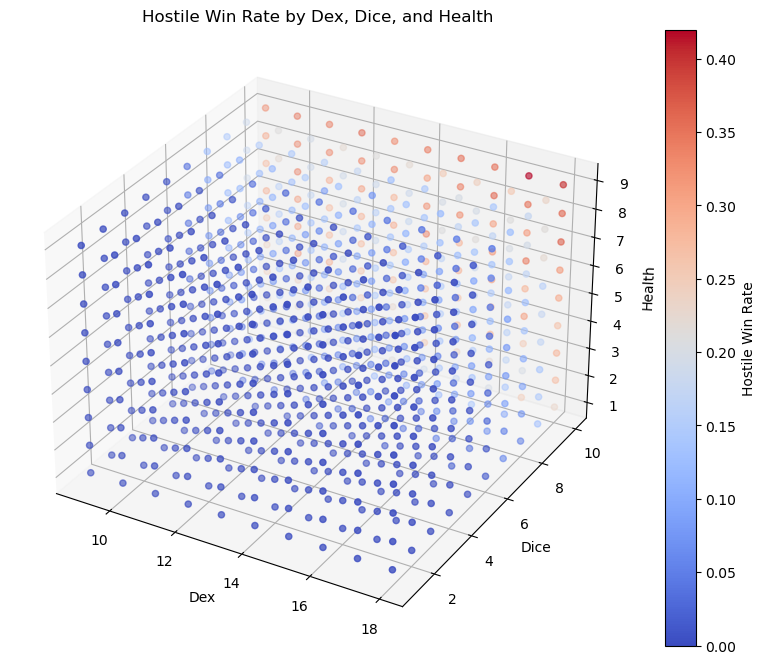

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert 'winner' to a binary variable where 'hostiles' = 1 and 'non-hostiles' = 0
data['winner'] = data['winner'].apply(lambda x: 1 if x == 'hostiles' else 0)

# Group by 'dex', 'dice', and 'health', and calculate the mean 'winner' value to get the win rate for hostiles
grouped_data = data.groupby(['dex', 'dice', 'health']).mean().reset_index()

# Display the first few rows of the grouped data
grouped_data.head()


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using dex, dice, health as axes and color by hostile win rate
sc = ax.scatter(grouped_data['dex'], grouped_data['dice'], grouped_data['health'], c=grouped_data['winner'], cmap='coolwarm')

# Adding labels and title
ax.set_xlabel('Dex')
ax.set_ylabel('Dice')
ax.set_zlabel('Health')
ax.set_title('Hostile Win Rate by Dex, Dice, and Health')

# Adding a color bar to indicate win rate
plt.colorbar(sc, label='Hostile Win Rate')

# Show the plot
plt.show()

In [30]:
data.head()

,dex,dice,health,winner
0,6,5,50,1
1,1,3,38,0
2,4,4,76,0
3,4,5,45,0
4,8,4,70,1


In [5]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
CSV_NAME = 'results.csv'
data = pd.read_csv(CSV_NAME)

# Convert 'winner' to a binary variable where 'hostiles' = 1 and 'non-hostiles' = 0
data['winner'] = data['winner'].apply(lambda x: 1 if x == 'hostiles' else 0)

# Group by 'dex', 'dice', and 'health', and calculate the mean 'winner' value to get the win rate for hostiles
grouped_data = data.groupby(['dex', 'dice', 'health']).mean().reset_index()


,dex,dice,health,Unnamed: 0,winner
0,9,1,1,249.5,0.000
1,9,1,2,749.5,0.000
2,9,1,3,1249.5,0.000
3,9,1,4,1749.5,0.000
4,9,1,5,2249.5,0.000
...,...,...,...,...,...
895,18,10,5,447749.5,0.300
896,18,10,6,448249.5,0.318
897,18,10,7,448749.5,0.368
898,18,10,8,449249.5,0.362


In [16]:
X_COL = 'dex'
Y_COL = 'health'
Z_COL = 'dice'

for X in range(1,11):
    fig_data=grouped_data[grouped_data['dice']==X]
    fig = px.density_heatmap(fig_data, x='dex', y='health', z='winner', nbinsx=max(fig_data[X_COL])-min(fig_data[X_COL]), nbinsy=max(fig_data[Y_COL])-min(fig_data[Y_COL]))
    fig.show()